# Prueba chi-cuadrado
## Ejemplo de grupo de productos

+ Grupo 1: Producto A: 30. Producto B: 10.
+ Grupo 2: Producto A: 20. Producto B: 40.

¿Existe alguna relaición entre ambos grupos?

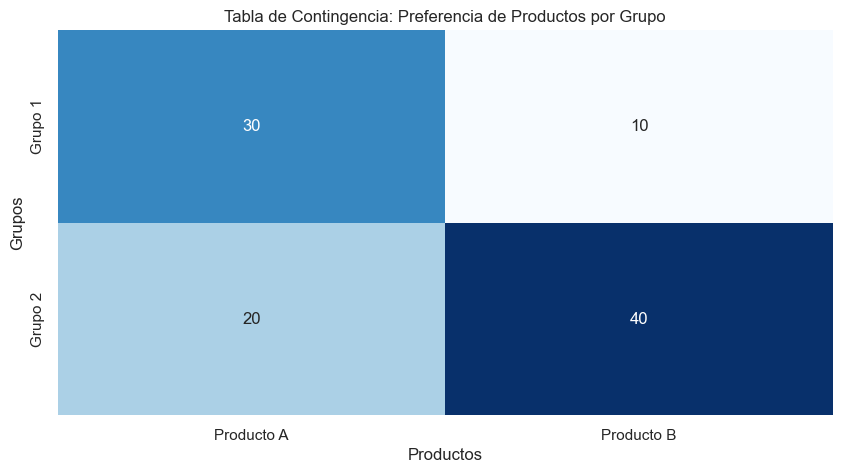

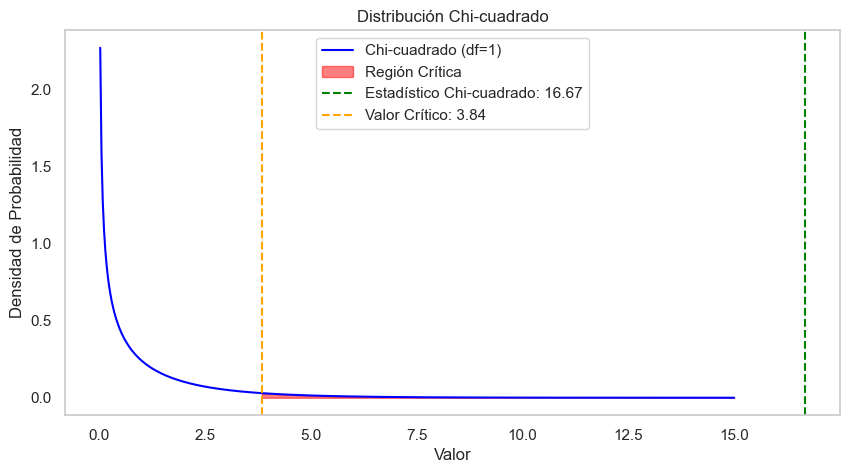

(16.666666666666668, 3.841458820694124, 4.455709060402491e-05)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, chisquare

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Crear la tabla de contingencia
data = np.array([[30, 10],  # Grupo 1
                 [20, 40]])  # Grupo 2
df_contingency = pd.DataFrame(data, columns=["Producto A", "Producto B"], index=["Grupo 1", "Grupo 2"])

# Calcular las frecuencias esperadas
total = df_contingency.sum().sum()
total_A = df_contingency["Producto A"].sum()
total_B = df_contingency["Producto B"].sum()
total_G1 = df_contingency.loc["Grupo 1"].sum()
total_G2 = df_contingency.loc["Grupo 2"].sum()

# Frecuencias esperadas
E_A1 = total_G1 * (total_A / total)  # Producto A, Grupo 1
E_B1 = total_G1 * (total_B / total)  # Producto B, Grupo 1
E_A2 = total_G2 * (total_A / total)  # Producto A, Grupo 2
E_B2 = total_G2 * (total_B / total)  # Producto B, Grupo 2

# Crear DataFrame para frecuencias esperadas
expected = pd.DataFrame([[E_A1, E_B1], [E_A2, E_B2]], columns=["Producto A", "Producto B"], index=["Grupo 1", "Grupo 2"])

# Calcular la estadística Chi-cuadrado
observed = df_contingency.values
chi2_stat = ((observed - expected.values) ** 2 / expected.values).sum()

# Grados de libertad
df = (2 - 1) * (2 - 1)  # (n_rows - 1) * (n_cols - 1)

# Valor crítico y valor p
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)
p_value = 1 - chi2.cdf(chi2_stat, df)

# Gráfico de la tabla de contingencia
plt.figure(figsize=(10, 5))
sns.heatmap(df_contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tabla de Contingencia: Preferencia de Productos por Grupo')
plt.xlabel('Productos')
plt.ylabel('Grupos')
plt.show()

# Gráfico de la distribución Chi-cuadrado
x = np.linspace(0, 15, 500)
y = chi2.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label=f'Chi-cuadrado (df={df})', color='blue')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Región Crítica')
plt.axvline(x=chi2_stat, color='green', linestyle='--', label=f'Estadístico Chi-cuadrado: {chi2_stat:.2f}')
plt.axvline(x=critical_value, color='orange', linestyle='--', label=f'Valor Crítico: {critical_value:.2f}')
plt.title('Distribución Chi-cuadrado')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()

# Resultados
chi2_stat, critical_value, p_value


__________________________________________________________________________________________________________________